In [1]:
import numpy as np
from skimage import io, color
import cv2
import matplotlib.pyplot as plt

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

In [2]:
channel = 2

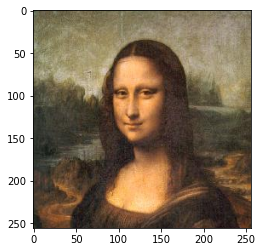

In [3]:
image = cv2.imread('monalisa.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(256, 256, 3)

### Converting to HSV

In [5]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lab.shape

(256, 256, 3)

## Appling the mask

In [6]:
#Set the luminance channel to be used
luminance = lab[:,:,channel]

In [7]:
def create_middle_tons(luminance, mask, limit=3):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image

    norm_luminance = luminance/255
    g = np.round(norm_luminance)
    
    for row in range(luminance.shape[0]-limit):
        for collumn in range(luminance.shape[1]-limit):

            erro = (luminance[row][collumn] - g[row][collumn])

            #Applyig the mask
            luminance = mask(luminance, erro, row, collumn)
    return luminance*255

In [8]:
def create_middle_tons_zigzag(luminance, mask, limit=3):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image

    norm_luminance = luminance/255
    g = np.round(norm_luminance)
    
    for row in range(luminance.shape[0]-limit):
        if row%2 == 0:    
            for collumn in range(luminance.shape[1]-limit):

                erro = (luminance[row][collumn] - g[row][collumn])

                #Applyig the mask
                luminance = mask(luminance, erro, row, collumn)
        else:
            for collumn in range(luminance.shape[1]-limit, limit, -1):

                erro = (luminance[row][collumn] - g[row][collumn])

                #Applyig the mask
                luminance = mask(luminance, erro, row, collumn, -1)
    return luminance*255

## Mask functions

In [9]:
def mask_Steinberg(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Floyd e Steinberg in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,-1,0,1]*zizag
    idx_collumns = [0,1,1,1]
    erro_tax = [7/16,3/16,5/16,1/16]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)*255
    
    return luminance 

In [10]:
def mask_Stevenson(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Stevenson in a pixel of the image, and return the luminance and erro;
    """
    
    idx_rows = [2,-3,-1,1,3,-2,0,+2,-3,-1,1,3]*zizag
    idx_collumns = [0,1,1,1,1,2,2,2,3,3,3,3]
    erro_tax = [32/200, 12/200, 26/200, 30/200, 16/200, 12/200, 26/200, 12/200, 5/200, 12/200, 12/200, 5/200]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)

    
    return luminance 

In [11]:
def mask_Burkes(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Burkes in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1]
    erro_tax = [8/32,4/32,2/32,4/32,8/32,4/32,2/32]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

In [12]:
def mask_Sierra(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-1,0,1]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2]
    erro_tax = [5/32,3/32,2/32,4/32,5/32,4/32,2/32,2/32,3/32,2/32]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

In [13]:
def mask_Stucki(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2,2,2]
    erro_tax = [8/42,4/42,2/42,4/42,8/42,4/42,2/42,1/42,2/42,4/42,2/42,1/42]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
        
    
    return luminance 

In [14]:
def mask_Jarvis(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2,2,2]
    erro_tax = [7/48, 5/48,3/48,5/48,7/48,5/48,3/48,1/48,3/48,5/48,3/48,1/48]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

## Aplying the masks

In [55]:
def apply_mask(mask, zigzag=True):
    lab_mask = lab.copy()
    luminance_mask = luminance.copy()
    
    luminance_mask = create_middle_tons(luminance_mask, mask)
    lab_mask[:,:,channel] = luminance_mask
    
    if zigzag:
        lab_mask_zigzag = lab.copy()
        luminance_mask_zigzag = luminance.copy()
        
        luminance_mask_zigzag = create_middle_tons_zigzag(luminance_mask_zigzag, mask)
        lab_mask_zigzag[:,:,channel] = luminance_mask_zigzag
        
        #Plot the results
        fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 8))
        ax0.imshow(img)

        img_copy = cv2.cvtColor(lab_mask, cv2.COLOR_HSV2RGB)
        ax1.imshow(img_copy)

        img_copy_zigzag = cv2.cvtColor(lab_mask_zigzag, cv2.COLOR_HSV2RGB)
        ax2.imshow(img_copy_zigzag)
        
    else:
       #Plot the results
        fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
        ax0.imshow(img)

        img_copy = cv2.cvtColor(lab_mask, cv2.COLOR_HSV2RGB)
        ax1.imshow(img_copy)


Else


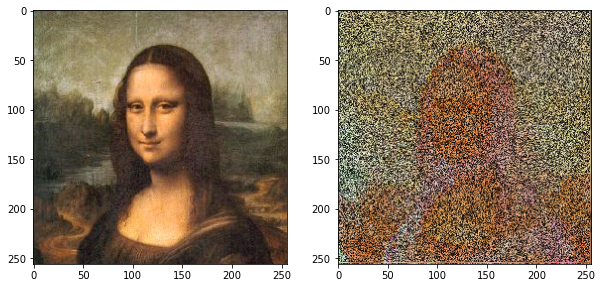

In [52]:
apply_mask(mask_Steinberg, False)

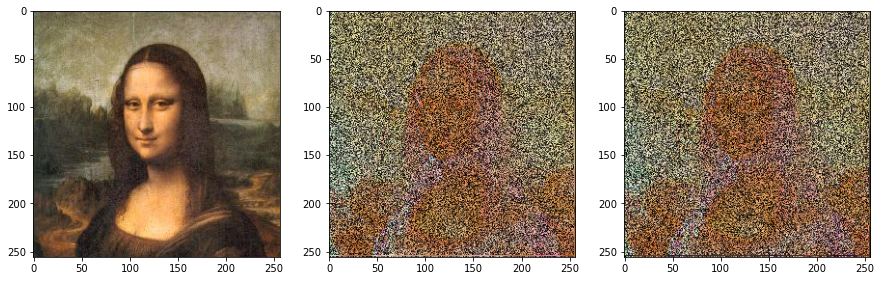

In [45]:
#Floyd e Steinberg Result
lab_Steinberg = lab.copy()
lab_Steinberg_zigzag = lab.copy()

luminance_Steinberg = luminance.copy()
luminance_Steinberg_zigzag = luminance.copy()

luminance_Steinberg = create_middle_tons(luminance_Steinberg, mask_Steinberg)
lab_Steinberg[:,:,channel] = luminance_Steinberg

luminance_Steinberg_zizag = create_middle_tons_zigzag(luminance_Steinberg, mask_Steinberg)
lab_Steinberg_zigzag[:,:,channel] = luminance_Steinberg_zizag

#Plot the results
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 8))
ax0.imshow(img)

img_Steinberg_copy = cv2.cvtColor(lab_Steinberg, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Steinberg_copy)

img_Steinberg_copy_zigzag = cv2.cvtColor(lab_Steinberg_zigzag, cv2.COLOR_HSV2RGB)
ax2.imshow(img_Steinberg_copy_zigzag)

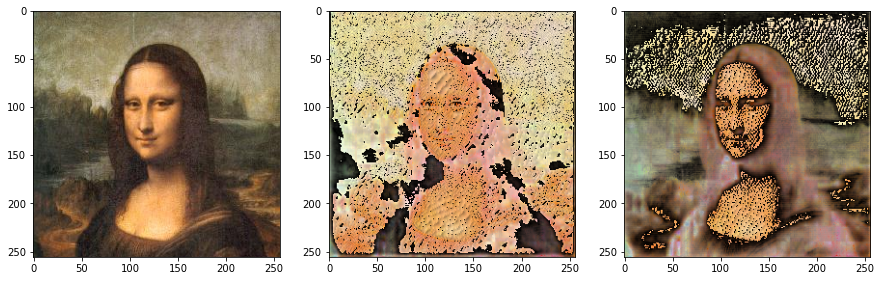

In [57]:
#Jarvis Result
apply_mask(mask_Jarvis, True)

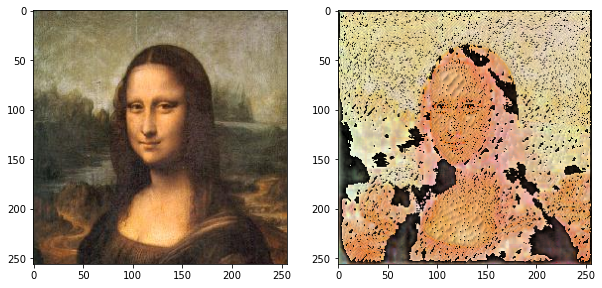

In [54]:

lab_Jarvis = lab.copy()
luminance_Jarvis= luminance.copy()
g_Jarvis = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Jarvis = create_middle_tons(luminance_Jarvis, mask_Jarvis, limit=2)
lab_Jarvis[:,:,channel] = luminance_Jarvis

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Jarvis_copy = cv2.cvtColor(lab_Jarvis, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Jarvis_copy)

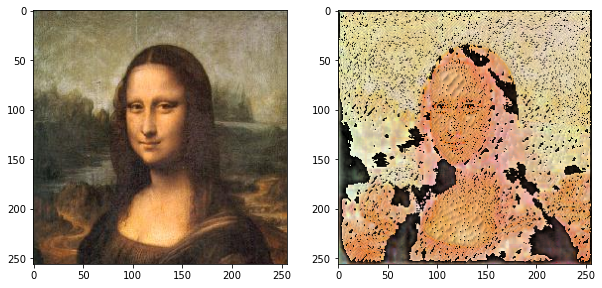

In [17]:
#Jarvis Result
lab_Jarvis = lab.copy()
luminance_Jarvis= luminance.copy()
g_Jarvis = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Jarvis = create_middle_tons(luminance_Jarvis, mask_Jarvis, limit=2)
lab_Jarvis[:,:,channel] = luminance_Jarvis

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Jarvis_copy = cv2.cvtColor(lab_Jarvis, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Jarvis_copy)

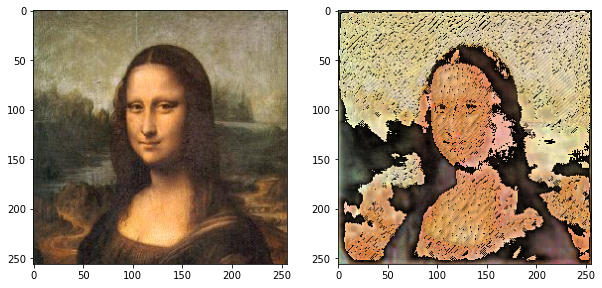

In [18]:
#Stevenson e Arce Result
lab_Stevenson = lab.copy()
luminance_Stevenson = luminance.copy()
g_Stevenson = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Stevenson = create_middle_tons(luminance_Stevenson, mask_Stevenson, limit=3)
lab_Stevenson[:,:,channel] = luminance_Stevenson

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Stevensons_copy = cv2.cvtColor(lab_Stevenson, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Stevensons_copy)

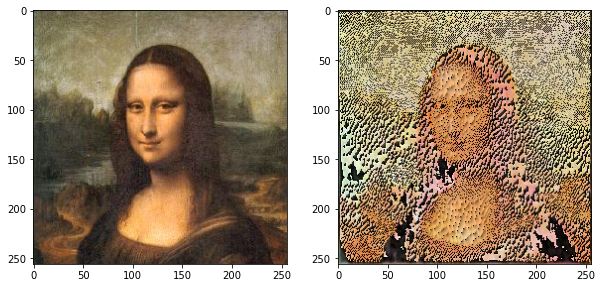

In [19]:
#Burkes Result
lab_Burkes = lab.copy()
luminance_Burkes = luminance.copy()
g_Burkes = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Burkes = create_middle_tons(luminance_Burkes, mask_Burkes, limit=2)
lab_Burkes[:,:,channel] = luminance_Burkes

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Burkes_copy = cv2.cvtColor(lab_Burkes, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Burkes_copy)

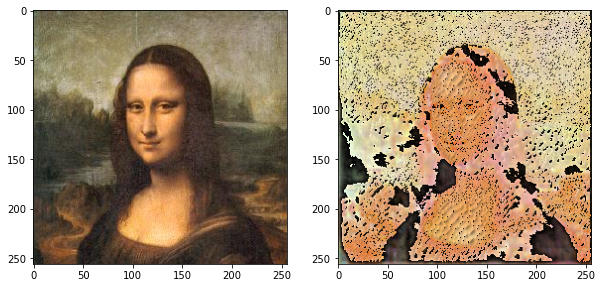

In [20]:
#Sierra Result
lab_Sierra= lab.copy()
luminance_Sierra = luminance.copy()
g_Sierra = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Sierra = create_middle_tons(luminance_Sierra, mask_Sierra, limit=2)
lab_Sierra[:,:,channel] = luminance_Sierra

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Sierra_copy = cv2.cvtColor(lab_Sierra, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Sierra_copy)

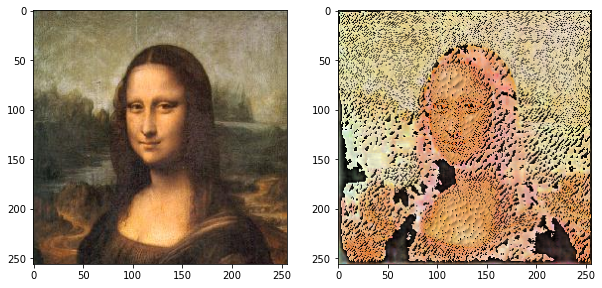

In [21]:
#Stucki Result
lab_Stucki= lab.copy()
luminance_Stucki= luminance.copy()
g_Stucki = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Stucki = create_middle_tons(luminance_Stucki, mask_Stucki, limit=2)
lab_Stucki[:,:,channel] = luminance_Stucki

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Stucki_copy = cv2.cvtColor(lab_Stucki, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Stucki_copy)